<a href="https://colab.research.google.com/github/SighanoCel/My-data-science-project/blob/main/Car_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# here we import the various libraries to analyze the dataset

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# Here we import the Dataset

df =pd.read_csv('/content/drive/MyDrive/DATA Pandas/mpg.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# This line of code prints a concise summary of our dataframe
# It's excellent for quickly understanding the structure of our data
# and identifying missing values or incorrect data types.


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# Here we calculate the Pearson correlation coefficient between all the numeric features
# in the dataframe and the 'acceleration' column which will represent the target.
# This code usually helps to detect a potential data leakage that could definately lead to overfitting.
# the data leakage occurs when an independent feature is strongly correlated to the target which can
# simply cause a biased and non performant model.

pear_cor = df.corr(numeric_only=True,method='pearson')['acceleration'].sort_values(ascending=False)

pear_cor*100

# With this code we also notice the absence of the feature "horsepower" among the feature correlated,
# simply because the algorythm has been setted to calculate only the numerical features. This is
# a problem because the horse power is a strong indicator of car performance,
# so missing it during the training of our model could lead to an incomplete performance predictions.
# So we will change its type and check its correlation to the target as well.

,acceleration
acceleration,100.000000
mpg,42.028891
model_year,28.813695
origin,20.587301
weight,-41.745732
cylinders,-50.541949
displacement,-54.368408


In [ ]:
# Checking for its unique values, we notice that the feature contains object type values and
# among those unique value there is a comma (?).We will set them as missing values and see how we will manage them.

df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
# lets change the type of the feature 'horsepower' and replace the comma by a null value

df['horsepower'] = df['horsepower'].replace('?',np.nan)
df['horsepower'] = df['horsepower'].astype('float')

In [ ]:
# Now, the feature is a float and the comma replaced by a missing value

print(df.horsepower.unique())
print(df.info())

[130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193.  nan 100. 105. 175. 153. 180.
 110.  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92.
 145. 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.
  52.  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152.
 102. 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138.
 135. 142.  77.  62. 132.  84.  64.  74. 116.  82.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null

In [ ]:
# let us recalculate the pearson correaltion between the numerical features
# and the target.

pear_cor2 = df.corr(numeric_only=True,method='pearson')['acceleration'].sort_values(ascending=False)

pear_cor2*100

# including the horsepower, we don't have any risk to a data leakage.
# we also notice that certain features are negatively correlated to the target.
# perhaps it's due to outliers. we will check it when performing the feature engineering.

,acceleration
acceleration,100.000000
mpg,42.028891
model_year,28.813695
origin,20.587301
weight,-41.745732
cylinders,-50.541949
displacement,-54.368408
horsepower,-68.919551


### Performing feature engineering to prepare our data for modelling

In [ ]:
# Checking for duplicated values.
# We notice that there are no missing values.

df[df.duplicated()].sum()

,0
mpg,0.0
cylinders,0
displacement,0.0
horsepower,0.0
weight,0
acceleration,0.0
model_year,0
origin,0
name,0


In [ ]:
# Obviously, as we computed above, the features horsepower contains 6 missing values
# which was previously comma.

df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [ ]:
# These are the rows in which the horsepower values is missing.


df[df['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


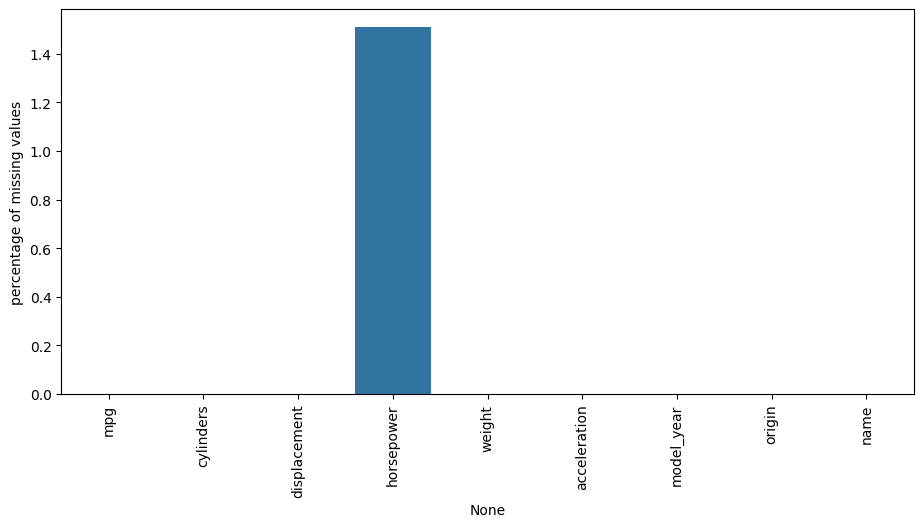

In [ ]:
# This code block is designed to visualize  trough a barplot,
# the percentage of missing values in each column of our DataFrame df.


percent_nan= 100*df.isnull().sum()/len(df)

plt.figure( figsize= (11,5),dpi=100)

sns.barplot(x=percent_nan.index,y=percent_nan)

plt.ylabel('percentage of missing values')

plt.xticks(rotation=90);

In [ ]:
# Here we are trying to fill the missing values in the 'horsepower' column of our DataFrame df,
# by updating the column with imputed values.
# This method ensures that missing horsepower values are estimated
# based on cars with similar engine configurations (number of cylinders).
# In a simple way, the algorithm assign to each horsepower missing value,
# the average horsepower based on car which have the same nomber of cylinder.

df['horsepower'] = df.groupby('cylinders')['horsepower'].transform(lambda value:value.fillna(value.mean()))

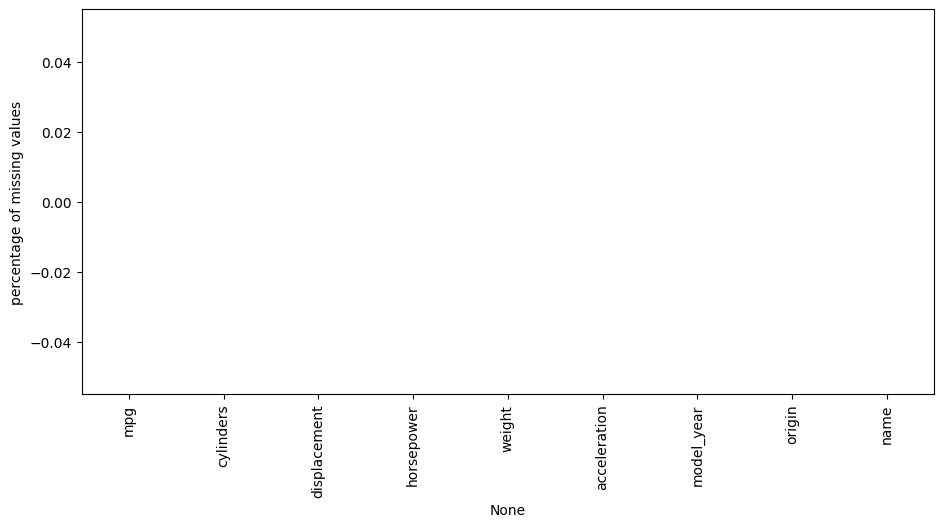

In [ ]:
# Now we notice that there is no longer missing values.

percent_nan= 100*df.isnull().sum()/len(df)

plt.figure( figsize= (11,5),dpi=100)

sns.barplot(x=percent_nan.index,y=percent_nan)

plt.ylabel('percentage of missing values')

plt.xticks(rotation=90);

### Outliers treatment

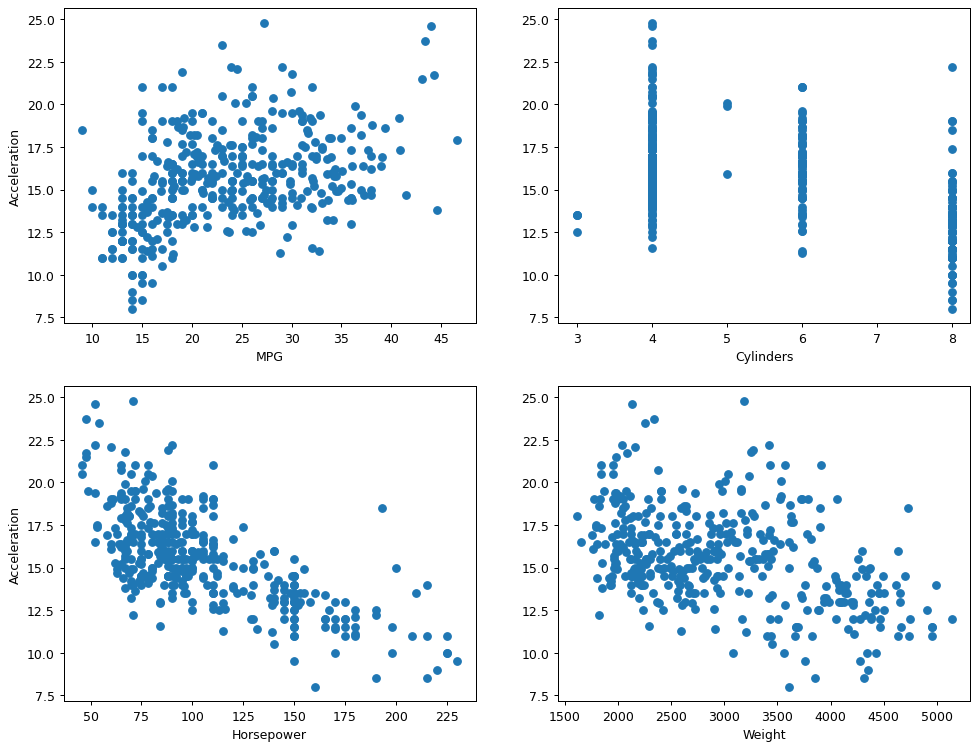

In [ ]:
# These Subplots will help identify potential outliers which can influence the performance
# of the model and definately lead to overfitting.
# Each plot helps visualize the relationship between 'acceleration'(our target variable)
# and other numerical features, making it easier
# to spot unusual data points that might be outliers.

fig,axe = plt.subplots(2,2,figsize=(13,10),dpi=90)

axe[0][0].plot(df['mpg'],df['acceleration'],'o')
axe[0][0].set_xlabel('MPG')
axe[0][0].set_ylabel('Acceleration')

axe[0][1].plot(df['cylinders'],df['acceleration'],'o')
axe[0][1].set_xlabel('Cylinders')

axe[1][0].plot(df['horsepower'],df['acceleration'],'o')
axe[1][0].set_xlabel('Horsepower')
axe[1][0].set_ylabel('Acceleration')

axe[1][1].plot(df['weight'],df['acceleration'],'o')
axe[1][1].set_xlabel('Weight');


Plot interpretation:

MPG vs. Acceleration: There's a general positive correlation, but some cars have remarkably high acceleration values (above 20) even with moderate mpg (around 20-25), which might be outliers. Conversely, some cars with very low mpg (below 15) also have surprisingly high acceleration.

Cylinders vs. Acceleration: The data points cluster clearly by the number of cylinders. For instance, 8-cylinder cars generally have lower acceleration (below 15), while 4-cylinder cars have higher acceleration (above 15). Outliers here would be 8-cylinder cars with unexpectedly high acceleration or 4-cylinder cars with unusually low acceleration. There are a few 8-cylinder cars with acceleration above 15 that could be considered unusual.

Horsepower vs. Acceleration: There's a strong negative correlation, meaning higher horsepower generally leads to lower acceleration. Potential outliers would be cars with very high horsepower that don't achieve low acceleration, or cars with low horsepower that have surprisingly low acceleration. A few points with very high horsepower (above 200) still show acceleration times above 10, which might be worth investigating.

Weight vs. Acceleration: A strong negative correlation is visible. Heavier cars tend to have lower acceleration. Outliers might include very heavy cars that exhibit unexpectedly high acceleration, or very light cars with surprisingly low acceleration. There are some data points with high weight (above 4000) but acceleration values around 15, which are somewhat divergent from the main trend.
Let us identify those ouliers and remove them from the dataset

In [ ]:
# Here we build a set of conditions to identify ouliers based on the scatterplot between
# the mpg and the acceleration

mpg_outliers =df[(df['acceleration']>14) & (df['mpg']<11) | (df['acceleration']>22.5) & (df['mpg']<30) | (df['acceleration']<15) & (df['mpg']>40)]
mpg_outliers

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
26,10.0,8,307.0,200.0,4376,15.0,70,1,chevy c20
28,9.0,8,304.0,193.0,4732,18.5,70,1,hi 1200d
59,23.0,4,97.0,54.0,2254,23.5,72,2,volkswagen type 3
299,27.2,4,141.0,71.0,3190,24.8,79,2,peugeot 504
309,41.5,4,98.0,76.0,2144,14.7,80,2,vw rabbit
329,44.6,4,91.0,67.0,1850,13.8,80,3,honda civic 1500 gl


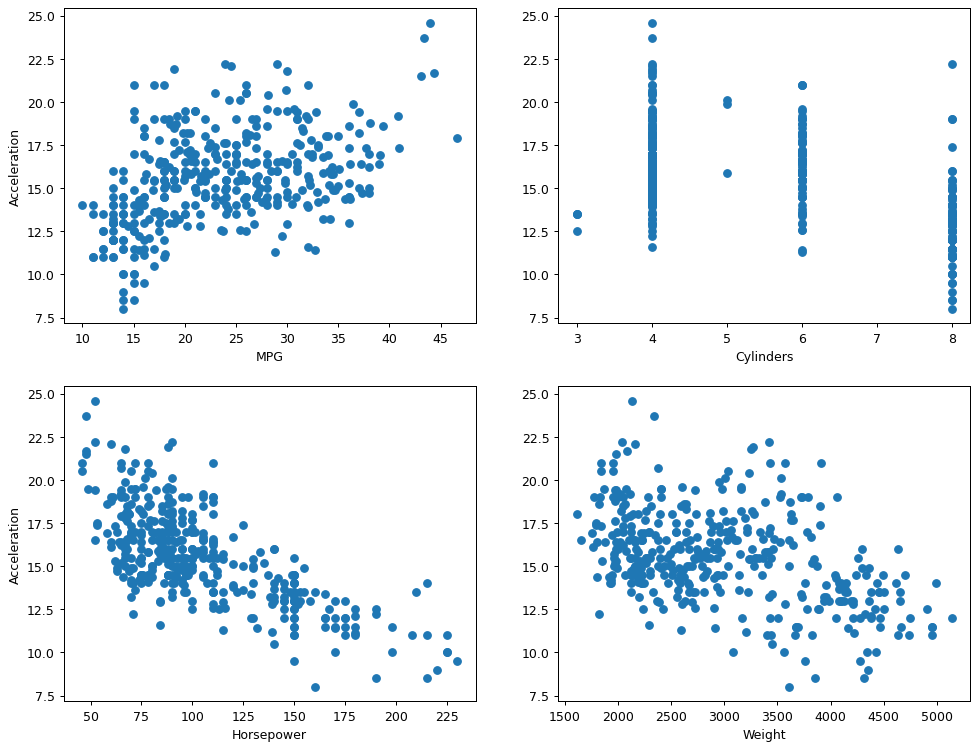

In [ ]:
# After having dropped the previews idetified mpg and acceleration outliers
# we can notice the result not only in the first plot but also in the weight,
# and horsepower making their correlation with the acceleration more linear.
# but it seems than there has been no influence on the cylinders feature.

df=df.drop(mpg_outliers.index)

fig,axe = plt.subplots(2,2,figsize=(13,10),dpi=90)

axe[0][0].plot(df['mpg'],df['acceleration'],'o')
axe[0][0].set_xlabel('MPG')
axe[0][0].set_ylabel('Acceleration')

axe[0][1].plot(df['cylinders'],df['acceleration'],'o')
axe[0][1].set_xlabel('Cylinders')

axe[1][0].plot(df['horsepower'],df['acceleration'],'o')
axe[1][0].set_xlabel('Horsepower')
axe[1][0].set_ylabel('Acceleration')

axe[1][1].plot(df['weight'],df['acceleration'],'o')
axe[1][1].set_xlabel('Weight');


In [ ]:
# Here we build a criteria to identify ouliers based on the scatterplot between
# the cylinders and the acceleration.

cylinders_ouliers = df[(df['acceleration']>=17.5) & (df['cylinders']==8)]

cylinders_ouliers

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
222,17.0,8,260.0,110.0,4060,19.0,77,1,oldsmobile cutlass supreme
300,23.9,8,260.0,90.0,3420,22.2,79,1,oldsmobile cutlass salon brougham
364,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


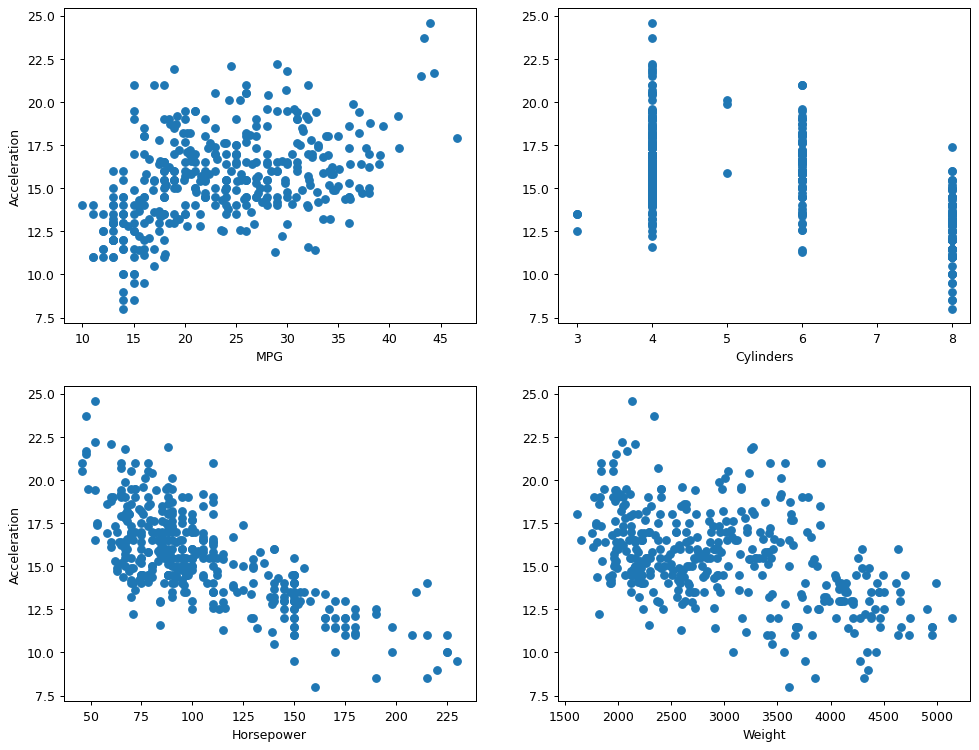

In [ ]:
# Dropping the identified outliers based on the corr between cylinders and acceleration,
# we notice on the plot, that our datset is well distributed. and ready for modeling without
# any risk of overfitting.

df=df.drop(cylinders_ouliers.index)

fig,axe = plt.subplots(2,2,figsize=(13,10),dpi=90)

axe[0][0].plot(df['mpg'],df['acceleration'],'o')
axe[0][0].set_xlabel('MPG')
axe[0][0].set_ylabel('Acceleration')

axe[0][1].plot(df['cylinders'],df['acceleration'],'o')
axe[0][1].set_xlabel('Cylinders')

axe[1][0].plot(df['horsepower'],df['acceleration'],'o')
axe[1][0].set_xlabel('Horsepower')
axe[1][0].set_ylabel('Acceleration')

axe[1][1].plot(df['weight'],df['acceleration'],'o')
axe[1][1].set_xlabel('Weight');


### Modeling part

The purpose of the modeling part in this notebook is to build and evaluate a regularized linear model for regression to predict the 'acceleration' of cars based on their features. It envoloves the **Data splitting** into train and test set, **the feature scaling** to normalize the features, which is crucial for model sensitive to feature scales like the regression and its regularisation (Ridge, Lasso, Elastic net),
**the model training** and its hyperparameter Tuning, **the model evaluation** trough the calculation of the common regression metrics to quantify the model's prediction accuracy, and finally **the model interpretation** using a Shapely Additive explanation in order to understand how each feature contributes to the model's output.

In [ ]:

# before performing the modeling and the prediction
# we will remove the column 'name' as it's not relevant
# for us and because this model can't perform with string values.

df= df.drop('name',axis=1)


# We also create a similar duplicate our dataframe and assign it to a new
# variable in order to use it exclusively for the modeling.

dataset = df

dataset.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [ ]:
# here we prepare our dataset for modeling by separating
# the features (independent variables) from the target variable (dependent variable).

X= dataset.drop('acceleration',axis=1)

y = dataset['acceleration']

#### Data Splitting for modelling

Here we only need to compute a train and test split, The training set to fit the model and the test set for its evaluation.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)

print(X_test.shape)

(272, 7)
(117, 7)


#### Performing feature scaling for modeling

Here we chosed to use a Santard scaler which is a crucial preprocessing step in machine learning, especially for models sensitive to the scale of features. Its primary purpose is to standardize features by removing the mean and scaling to unit variance. This transformation results in a distribution with a mean of 0 and a standard deviation of 1.

In [ ]:
# let us create an instance of a standard scaler

scaler= StandardScaler()

In [ ]:
X_train= scaler.fit_transform(X_train)

X_test= scaler.transform(X_test)

In [ ]:
X_test[2,:]

array([-0.08397458, -0.84662967, -0.50779652, -0.69390952, -0.44182178,
       -0.33656501, -0.73397366])

### Modeling and Prediction

In [ ]:
# For the begining, we create an instance of ElasticNet model and perform a combination of hyperparameters using
# the 'grid search' function ( which is a powerful technique for hyperparameter tuning).
# Initially, we call an instance of the model without adjusting the various parameters. Therefore, we leave it with its default parameters.
# here the purpose is to use a grid seach to find the best hyperparameters 'Alpha' and 'l1_ratio'suitable for our data.

elasticnet_model = ElasticNet()

How can we be sure that the choice of the default hyperparameter lambda (λ) which multiplies the penalty term (either the absolute value of the coefficients or the square of the coefficients) is the right one? How can we be sure that default elastic mixting parameter l1_ratio is the best choice to train our data? Here we will use a grid search cross validation algorithm (GridSearchCV) to identify the best choice of alpha (lambda).

In [ ]:
# here We create a parameter of the space or grid to be tested as a dictionary where the hyperparameters (alpha(λ), l1_ratio) are the keys
# and their list of values ​​are the values ​​of this dictionary.

# For each alpha, the grid search model will create 5 combinations (CV=5)
# with each l1_ratio, in order to identify the best combination.

# Usually,a good starting point for alpha values often includes powers of 10, both smaller and larger.
# For l1_ratio, it's good to cover the full spectrum from pure L2 to pure L1, including intermediate values.

grid_parameters= {'alpha':[0.001,0.01,0.1,1,10,100], 'l1_ratio':[0, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
# This line simply initializes an ElasticNet regression model.
# At this point, elasticnet_model is an instance of the ElasticNet class,
# set up with its default parameters, ready to be trained on data or have its hyperparameters tuned,
# as is done in the subsequent steps with GridSearchCV.

grid_model= GridSearchCV(estimator=elasticnet_model,
                         param_grid=grid_parameters,
                         scoring='neg_mean_squared_error',
                         cv=5, verbose=3)

# Reminder: Why using the negative MSE? GridSearchCV (and cross_val_score) in scikit-learn
# always tries to maximize the score returned by the scoring parameter.
# Since error metrics like Mean Squared Error (MSE) are better when they are lower,
# they are transformed into a 'negative' version so that GridSearchCV can maximize them.
# Maximizing a negative error is equivalent to minimizing the positive error. So, neg_mean_squared_error
# is used to convert the minimization problem of MSE into a maximization problem that GridSearchCV can handle.

In [ ]:
grid_model.fit(X_train,y_train)

# here, we can notice that during the training, for each alpha parameter, we have 5 combinations with each l1_ratio parameter.

# These 5 combinations result from the 5 cross-validations.

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END ..........alpha=0.001, l1_ratio=0;, score=-1.891 total time=   0.0s
[CV 2/5] END ..........alpha=0.001, l1_ratio=0;, score=-2.110 total time=   0.0s
[CV 3/5] END ..........alpha=0.001, l1_ratio=0;, score=-2.750 total time=   0.0s
[CV 4/5] END ..........alpha=0.001, l1_ratio=0;, score=-2.716 total time=   0.0s
[CV 5/5] END ..........alpha=0.001, l1_ratio=0;, score=-4.041 total time=   0.0s
[CV 1/5] END ........alpha=0.001, l1_ratio=0.1;, score=-1.890 total time=   0.0s
[CV 2/5] END ........alpha=0.001, l1_ratio=0.1;, score=-2.110 total time=   0.0s
[CV 3/5] END ........alpha=0.001, l1_ratio=0.1;, score=-2.750 total time=   0.0s
[CV 4/5] END ........alpha=0.001, l1_ratio=0.1;, score=-2.716 total time=   0.0s
[CV 5/5] END ........alpha=0.001, l1_ratio=0.1;, score=-4.042 total time=   0.0s
[CV 1/5] END ........alpha=0.001, l1_ratio=0.3;, score=-1.889 total time=   0.0s
[CV 2/5] END ........alpha=0.001, l1_ratio=0.3;

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.926e+02, tolerance: 1.592e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.852e+02, tolerance: 1.503e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV 4/5] END ........alpha=0.001, l1_ratio=0.9;, score=-2.720 total time=   0.0s
[CV 5/5] END ........alpha=0.001, l1_ratio=0.9;, score=-4.053 total time=   0.0s
[CV 1/5] END .......alpha=0.001, l1_ratio=0.95;, score=-1.886 total time=   0.0s
[CV 2/5] END .......alpha=0.001, l1_ratio=0.95;, score=-2.106 total time=   0.0s
[CV 3/5] END .......alpha=0.001, l1_ratio=0.95;, score=-2.745 total time=   0.0s
[CV 4/5] END .......alpha=0.001, l1_ratio=0.95;, score=-2.720 total time=   0.0s
[CV 5/5] END .......alpha=0.001, l1_ratio=0.95;, score=-4.053 total time=   0.0s
[CV 1/5] END .......alpha=0.001, l1_ratio=0.99;, score=-1.886 total time=   0.0s
[CV 2/5] END .......alpha=0.001, l1_ratio=0.99;, score=-2.106 total time=   0.0s
[CV 3/5] END .......alpha=0.001, l1_ratio=0.99;, score=-2.745 total time=   0.0s
[CV 4/5] END .......alpha=0.001, l1_ratio=0.99;, score=-2.720 total time=   0.0s
[CV 5/5] END .......alpha=0.001, l1_ratio=0.99;, score=-4.054 total time=   0.0s
[CV 1/5] END ..........alpha

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.076e+02, tolerance: 1.592e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.005e+02, tolerance: 1.503e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV 3/5] END ........alpha=0.01, l1_ratio=0.95;, score=-2.811 total time=   0.0s
[CV 4/5] END ........alpha=0.01, l1_ratio=0.95;, score=-2.704 total time=   0.0s
[CV 5/5] END ........alpha=0.01, l1_ratio=0.95;, score=-3.937 total time=   0.0s
[CV 1/5] END ........alpha=0.01, l1_ratio=0.99;, score=-1.881 total time=   0.0s
[CV 2/5] END ........alpha=0.01, l1_ratio=0.99;, score=-2.082 total time=   0.0s
[CV 3/5] END ........alpha=0.01, l1_ratio=0.99;, score=-2.809 total time=   0.0s
[CV 4/5] END ........alpha=0.01, l1_ratio=0.99;, score=-2.706 total time=   0.0s
[CV 5/5] END ........alpha=0.01, l1_ratio=0.99;, score=-3.941 total time=   0.0s
[CV 1/5] END ...........alpha=0.01, l1_ratio=1;, score=-1.881 total time=   0.0s
[CV 2/5] END ...........alpha=0.01, l1_ratio=1;, score=-2.082 total time=   0.0s
[CV 3/5] END ...........alpha=0.01, l1_ratio=1;, score=-2.808 total time=   0.0s
[CV 4/5] END ...........alpha=0.01, l1_ratio=1;, score=-2.706 total time=   0.0s
[CV 5/5] END ...........alph

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.944e+02, tolerance: 1.592e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.864e+02, tolerance: 1.503e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV 4/5] END ............alpha=0.1, l1_ratio=0;, score=-2.788 total time=   0.0s
[CV 5/5] END ............alpha=0.1, l1_ratio=0;, score=-3.937 total time=   0.0s
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.1;, score=-2.295 total time=   0.0s
[CV 2/5] END ..........alpha=0.1, l1_ratio=0.1;, score=-2.557 total time=   0.0s
[CV 3/5] END ..........alpha=0.1, l1_ratio=0.1;, score=-3.641 total time=   0.0s
[CV 4/5] END ..........alpha=0.1, l1_ratio=0.1;, score=-2.764 total time=   0.0s
[CV 5/5] END ..........alpha=0.1, l1_ratio=0.1;, score=-3.908 total time=   0.0s
[CV 1/5] END ..........alpha=0.1, l1_ratio=0.3;, score=-2.240 total time=   0.0s
[CV 2/5] END ..........alpha=0.1, l1_ratio=0.3;, score=-2.526 total time=   0.0s
[CV 3/5] END ..........alpha=0.1, l1_ratio=0.3;, score=-3.586 total time=   0.0s
[CV 4/5] END ..........alpha=0.1, l1_ratio=0.3;, score=-2.719 total time=   0.0s
[CV 5/5] END ..........alpha=0.1, l1_ratio=0.3;, score=-3.846 total time=   0.0s
[CV 1/5] END ..........alpha

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.501e+02, tolerance: 1.592e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.327e+02, tolerance: 1.503e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV 5/5] END ............alpha=1, l1_ratio=0.3;, score=-5.650 total time=   0.0s
[CV 1/5] END ............alpha=1, l1_ratio=0.5;, score=-3.305 total time=   0.0s
[CV 2/5] END ............alpha=1, l1_ratio=0.5;, score=-4.240 total time=   0.0s
[CV 3/5] END ............alpha=1, l1_ratio=0.5;, score=-5.448 total time=   0.0s
[CV 4/5] END ............alpha=1, l1_ratio=0.5;, score=-3.900 total time=   0.0s
[CV 5/5] END ............alpha=1, l1_ratio=0.5;, score=-5.703 total time=   0.0s
[CV 1/5] END ............alpha=1, l1_ratio=0.7;, score=-3.212 total time=   0.0s
[CV 2/5] END ............alpha=1, l1_ratio=0.7;, score=-4.285 total time=   0.0s
[CV 3/5] END ............alpha=1, l1_ratio=0.7;, score=-5.523 total time=   0.0s
[CV 4/5] END ............alpha=1, l1_ratio=0.7;, score=-3.970 total time=   0.0s
[CV 5/5] END ............alpha=1, l1_ratio=0.7;, score=-5.737 total time=   0.0s
[CV 1/5] END ............alpha=1, l1_ratio=0.9;, score=-3.225 total time=   0.0s
[CV 2/5] END ............alp

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.092e+02, tolerance: 1.592e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.750e+02, tolerance: 1.503e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV 4/5] END ...........alpha=10, l1_ratio=0.7;, score=-6.697 total time=   0.0s
[CV 5/5] END ...........alpha=10, l1_ratio=0.7;, score=-8.435 total time=   0.0s
[CV 1/5] END ...........alpha=10, l1_ratio=0.9;, score=-5.266 total time=   0.0s
[CV 2/5] END ...........alpha=10, l1_ratio=0.9;, score=-6.805 total time=   0.0s
[CV 3/5] END ...........alpha=10, l1_ratio=0.9;, score=-7.978 total time=   0.0s
[CV 4/5] END ...........alpha=10, l1_ratio=0.9;, score=-6.697 total time=   0.0s
[CV 5/5] END ...........alpha=10, l1_ratio=0.9;, score=-8.435 total time=   0.0s
[CV 1/5] END ..........alpha=10, l1_ratio=0.95;, score=-5.266 total time=   0.0s
[CV 2/5] END ..........alpha=10, l1_ratio=0.95;, score=-6.805 total time=   0.0s
[CV 3/5] END ..........alpha=10, l1_ratio=0.95;, score=-7.978 total time=   0.0s
[CV 4/5] END ..........alpha=10, l1_ratio=0.95;, score=-6.697 total time=   0.0s
[CV 5/5] END ..........alpha=10, l1_ratio=0.95;, score=-8.435 total time=   0.0s
[CV 1/5] END ..........alpha

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.836e+02, tolerance: 1.592e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.408e+02, tolerance: 1.503e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV 2/5] END ..........alpha=100, l1_ratio=0.7;, score=-6.805 total time=   0.0s
[CV 3/5] END ..........alpha=100, l1_ratio=0.7;, score=-7.978 total time=   0.0s
[CV 4/5] END ..........alpha=100, l1_ratio=0.7;, score=-6.697 total time=   0.0s
[CV 5/5] END ..........alpha=100, l1_ratio=0.7;, score=-8.435 total time=   0.0s
[CV 1/5] END ..........alpha=100, l1_ratio=0.9;, score=-5.266 total time=   0.0s
[CV 2/5] END ..........alpha=100, l1_ratio=0.9;, score=-6.805 total time=   0.0s
[CV 3/5] END ..........alpha=100, l1_ratio=0.9;, score=-7.978 total time=   0.0s
[CV 4/5] END ..........alpha=100, l1_ratio=0.9;, score=-6.697 total time=   0.0s
[CV 5/5] END ..........alpha=100, l1_ratio=0.9;, score=-8.435 total time=   0.0s
[CV 1/5] END .........alpha=100, l1_ratio=0.95;, score=-5.266 total time=   0.0s
[CV 2/5] END .........alpha=100, l1_ratio=0.95;, score=-6.805 total time=   0.0s
[CV 3/5] END .........alpha=100, l1_ratio=0.95;, score=-7.978 total time=   0.0s
[CV 4/5] END .........alpha=

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99,
                                      1]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# Here we display the the exact configuration of the model that performed best.
# And secondly we show the negative mean squared error, which we would interpret
# as the smallest (closest to zero) negative value indicating
# the best performance in terms of minimizing the mean squared error.

print(f'the best ElasticNet model found by the grid search is:{grid_model.best_estimator_}')
print(f'and the best score is : {grid_model.best_score_}')

the best ElasticNet model found by the grid search is:ElasticNet(alpha=0.01, l1_ratio=0.99)
and the best score is : -2.68370609003901


In [ ]:
# Here we perform a crucial step in the machine learning workflow: making predictions on our unseen data
# Which is X_test, the testing dataset containing the features of cars that
# the model has not seen before. Now we can evaluate with the metrics how well the model generalizes to new data.

predictions= grid_model.predict(X_test)

predictions


array([13.87129413, 17.25139662, 17.28496253, 14.26417653, 17.76094273,
       15.96902585, 13.2695535 , 16.71654944, 16.32284514, 16.80775806,
       14.37617862, 13.90653214, 15.17955732, 15.85680791, 16.50160432,
       18.059726  , 15.85229084, 13.24622552, 13.69417145, 13.81388788,
       18.15685864, 18.5441213 , 15.47588473, 16.25456124, 16.35431605,
       16.17107514, 17.01348403, 17.04259678, 17.221764  , 16.29136267,
       15.60034353,  9.50783395, 16.33647017, 16.63343192, 15.31351681,
       12.80096565,  9.39094122, 15.4358796 , 11.37634167, 16.70779569,
       17.29200795, 17.1150595 , 13.93015471, 16.795006  , 13.62729901,
       16.61982992, 11.97791764, 15.98337053, 16.22325864, 16.10118492,
       18.74307395, 15.96840545, 15.53133003, 14.83887802,  7.053141  ,
       15.61450102, 15.63978048, 13.53692601, 15.94142602, 17.69705976,
       16.97520532, 16.77005836, 18.46275388, 16.45187131, 16.76395587,
       10.13558324, 16.58957022, 17.08758881, 17.06019785, 14.55

#### Model Evaluation

In [ ]:
# At this point we can compute an evaluation using the RMSE (square root of the mean squared error) metric
# which penalizes larger errors more heavily
# Taking the square root brings the error metric back
# to the same units as our target variable, 'acceleration',

rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(rmse)

print(np.std(y_test))



1.6898178328290028
2.7898307867217387


#### Metric's interpretation:

Given our RMSE of approximately 1.69 and the standard deviation of my test target variable (y_test) being around 2.79, we can say that our model has predictive power.
Why? On average, our model's predictions for car acceleration deviate from the actual acceleration values by about 1.69 units.While the typical spread or variability of the actual acceleration values in our test set is 1.1 higher, suggesting that our model is performing better than a naive model that would just predict the average acceleration every time. The model has learned some meaningful patterns in the data to reduce the prediction error by roughly 40% compared to just using the mean as a prediction. the deviation of our model prediction form the car acceleration would be closest to the original variability of the actual acceleration (2.79),if it was a naive model which simply predict the average of acceleration for every instance.

#### Shapely Additive explanation for model interpretation

 This section consist of using a SHAP model to interpret the predictions made by our model.
shap_values are calculated for the test set (X_test). These values represent how much each feature contributed to pushing the prediction higher or lower for each individual test sample.

In [ ]:
# let us import the shap library
!pip install shap

import shap

shap.initjs()

In [ ]:
Xtrain_features= pd.DataFrame(X_train,columns=X.columns)

Xtest_features=pd.DataFrame(X_test,columns=X.columns)

Xtrain_features

# Turn the scaled X_train to a dataframe in order to provide name for the scaled value of the training set. this will help to fill the parameter
# feature_name of the SHAP explainer

,mpg,cylinders,displacement,horsepower,weight,model_year,origin
0,-0.342504,0.346548,0.060086,-0.370597,-0.375981,-1.727837,-0.733974
1,-0.213239,0.346548,0.377716,0.222144,-0.156121,1.611215,-0.733974
2,1.816218,-0.846630,-0.998678,-1.124993,-1.079065,1.332961,1.715607
3,-0.264945,-0.846630,-0.690674,0.302972,-0.203150,0.498198,0.490817
4,-1.053460,1.539725,1.523106,1.030426,1.277088,0.776452,-0.733974
...,...,...,...,...,...,...,...
267,-1.376622,1.539725,1.051475,0.976541,1.559262,-1.171328,-0.733974
268,-0.342504,-0.846630,-0.507797,-0.855566,-0.666385,-0.893074,-0.733974
269,-0.432989,-0.250041,-0.594423,-0.020341,-0.161999,0.498198,0.490817
270,1.131114,-0.846630,-0.815801,-0.774738,-0.726347,1.332961,1.715607


In [ ]:
Xtest_features

,mpg,cylinders,displacement,horsepower,weight,model_year,origin
0,-0.859563,0.346548,-0.286418,0.572400,0.202475,0.498198,0.490817
1,-0.730298,0.346548,0.550968,-0.424482,0.201300,-1.449582,-0.733974
2,-0.083975,-0.846630,-0.507797,-0.693910,-0.441822,-0.336565,-0.733974
3,-1.376622,1.539725,1.994738,1.919537,2.553925,-1.449582,-0.733974
4,1.027702,-0.846630,-0.700299,-0.801681,-0.391266,1.332961,1.715607
...,...,...,...,...,...,...,...
112,-0.484695,1.539725,0.647219,0.168258,0.467013,0.498198,-0.733974
113,-0.924196,1.539725,1.513481,2.054251,1.660374,-0.058311,-0.733974
114,-0.601034,-0.846630,-0.681049,-0.505310,-0.773376,-0.893074,-0.733974
115,-0.342504,0.346548,0.069711,-0.505310,-0.447700,-1.727837,-0.733974


In [ ]:
# Initialize the SHAP explainer and compute SHAP values
# We use grid_model.best_estimator_ to get the best ElasticNet model found by GridSearchCV.
# X_train is used as the background data, and X.columns provides feature names.
explainer = shap.Explainer(model=grid_model.best_estimator_.predict,masker=shap.maskers.Independent(Xtrain_features),feature_names=Xtrain_features.columns)

# Compute SHAP values for the test set
shap_values = explainer(Xtest_features)



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
ExactExplainer explainer:   1%|          | 1/117 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:27

In [ ]:
print('SHAP values computed successfully.')
print('Shape of SHAP values:', shap_values.values.shape)
print('Shape of Xtest_features:', Xtest_features.shape)

SHAP values computed successfully.
Shape of SHAP values: (117, 7)
Shape of Xtest_features: (117, 7)


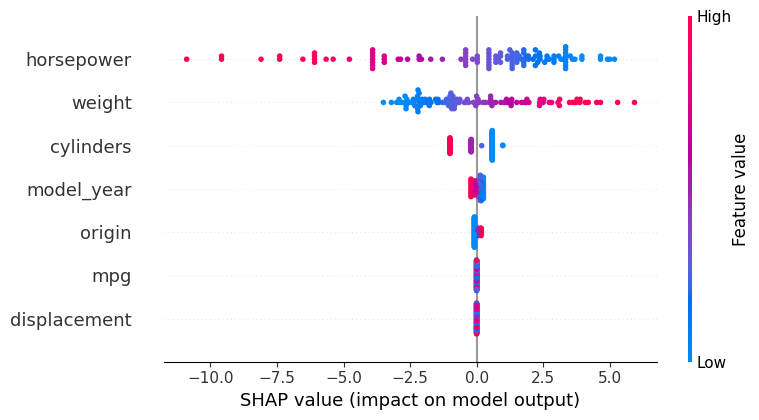

In [ ]:
# SHAP Summary Plot (Beeswarm Plot)
# This plot shows how each feature impacts the model's output for individual predictions.
# Each dot represents an observation from the dataset.
# The position of the dot on the x-axis indicates the SHAP value for that feature.
# The color indicates the feature value (red for high, blue for low).
# This helps to understand the distribution of feature impacts and correlations.
shap.summary_plot(shap_values, Xtest_features)

#### Interpretation of the SHAP Summary (Beeswarm) Plot

This plot provides a global overview of how individual features affect the model's predictions:
- On the vertical axis, we have the list of features. Features are ranked by their overall importance, with the most impactful features at the top. The features are ordered based on the sum of the absolute SHAP values across all samples.
- On the horizontal axis (SHAP Value): This axis represents the SHAP value for each feature. A positive SHAP value means the feature pushes the prediction higher, while a negative value pushes it lower.

- Each dot on the plot represents a single car (an instance from the test dataset). The position of the dot on the horizontal axis indicates the SHAP value for that feature for that specific car.

- The color of each dot indicates the original value of the feature for that instance. The Red color(High Value) means that the feature had a relatively high value for that particular car and the blue dot means that the feature had a relatively low value for that particular car.

Key Insights from the Plot:
Feature Importance: Features higher on the y-axis are generally more important for the model's predictions. From the numerical analysis, horsepower is the most influential feature, followed by weight, and then cylinders.

Direction of Impact:

For horsepower, weight and cylinders, we observe a strong trend: high values (red dots) tend to have negative SHAP values, pushing acceleration lower. Conversely, low values (blue dots) tend to have positive SHAP values, pushing acceleration higher. This indicates that higher horsepower, weight, and a greater number of cylinders are associated with lower acceleration (higher 0-60mph times), which aligns with common automotive knowledge.
suggests that cars with better fuel efficiency (higher mpg) generally have better acceleration.
model_year, origin, and displacement also contribute, but their effects appear less consistent or less strong compared to the top features.
Let us focus on the weight impact on model prediction that could be very tricky to unserstand. The high values(red dots) of the weight tend to the positive Shap values rather than the negative, simply because in the automotive field, acceleration usually refers to the time it takes for a vehicle to accelerate from 0 to 60 miles per hour (or similar metric). So a lower acceleration value means faster acceleration. (e.g., 8 seconds from 0-60 mph is faster than 15 seconds), consequently, acceleration value means slower acceleration.
When we observe in the summary plot that the Weight itself has a significant positive SHAP value , it means that as the weight of the car increases, it pushes the predicted acceleration value upwards.
Since a higher acceleration value signifies slower acceleration, this interpretation is perfectly aligned: more weight leads to slower acceleration (higher acceleration time).This directly translates to: the more positive the SHAP value for 'weight', the slower the car will be.

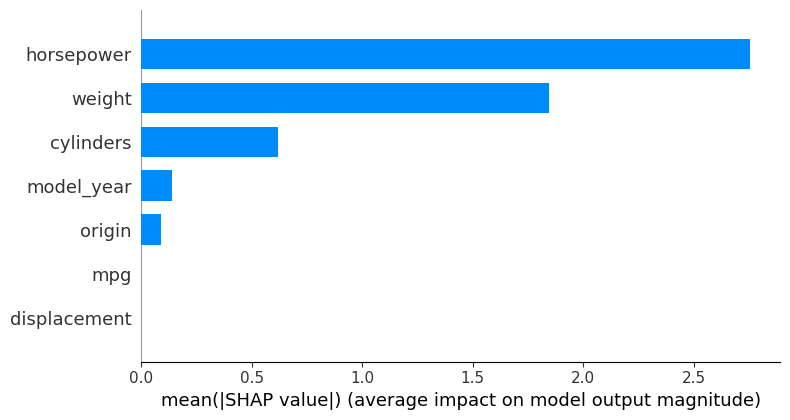

In [ ]:
# SHAP Feature Importance Bar Chart
# This plot aggregates the absolute SHAP values for each feature across all observations.
# It provides a global view of feature importance, indicating which features have the largest overall impact on the model's predictions.

shap.summary_plot(shap_values, Xtest_features, plot_type='bar')

## Conclusion: Car Performance Prediction

This notebook embarked on a comprehensive journey to predict car acceleration based on various vehicle features. We followed a structured machine learning pipeline, from data preparation to model interpretation.
This analysis successfully built a predictive model for car acceleration, providing clear insights into which features are most influential and how they impact the outcome. The interpretability provided by SHAP values helps to understand the model's decisions and aligns with real-world automotive principles, particularly the trade-off between horsepower and weight in achieving faster acceleration.